In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import huber
from scipy.misc import derivative as drv
from mpl_toolkits.mplot3d import axes3d
from raster_chunks import GeoChunks as gc

In [71]:
#1D Testing
_input = 100*np.random.ranf(100)
_slope = np.gradient(_input)

In [3]:
_input_tif = gc('/home/madhavm/Desktop/opt_test_small.tif')
_input = _input_tif.read()
_input.shape

(25, 25)

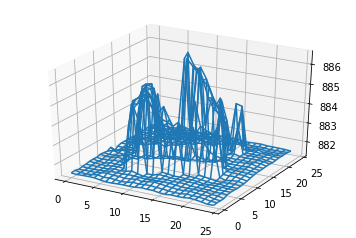

In [4]:
#2D testing
nx, ny = 25,25
x = range(nx)
y = range(ny)
#_input = 100*np.random.ranf([nx,ny])
grad = lambda x: (np.gradient(x)[0]**2 + np.gradient(x)[1]**2)**0.5
loss = lambda x: np.sum(huber(1,grad(x.reshape(_input.shape)))) + 0.25*np.sum(np.abs(_input - x.reshape(_input.shape)))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X,Y = np.meshgrid(y,x)
ax.plot_wireframe(X=X,Y=Y,Z=_input)
plt.show()

In [10]:
flat = _input.flatten()
bnds = []
for i in flat:
    bd = [0,i]
    bnds.append(tuple(bd))
len(bnds)

625

In [11]:
#bnds = [0,1]
res = minimize(loss,_input,method='L-BFGS-B',bounds=bnds,options={'disp':True})

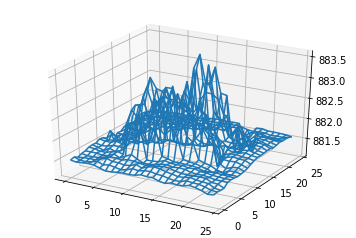

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X,Y = np.meshgrid(y,x)
ax.plot_wireframe(X=X,Y=Y,Z=res.x.reshape(nx,ny))
plt.show()

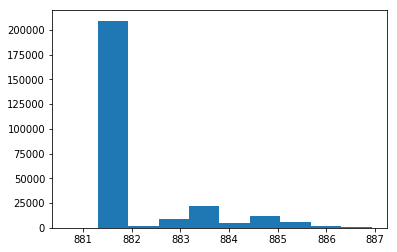

In [11]:
plt.hist(_input.flatten())
plt.show()

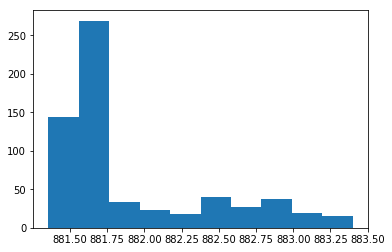

In [8]:
plt.hist(res.x)
plt.show()


In [77]:
np.mean(res.x)

17.389545439468279

In [54]:
np.mean(flat)

50.560450820354305

In [13]:
test = gc.create_from(_input_tif,'/home/madhavm/Desktop/test_small.tif')
test.write(res.x.reshape(_input.shape))
test = None